## Name:G C  Poojith Reddy
# Task 1: Prediction using Supervised ML
### The Sparks Foundation

### Data Science & Business Analytics Intern August 21
### Topic: Predict the percentage of an student based on the no. of study hours.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('task.csv')


In [30]:
df = pd.DataFrame(data)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
Hours,Scores    25 non-null object
dtypes: object(1)
memory usage: 328.0+ bytes


In [31]:
dm = df.values

In [35]:
h = []
s = []
for i in range(0, len(dm)):
    dm1 = dm[i][0]
    sp = dm1.split(',')
    h.append(float(sp[0]))
    s.append(float(sp[1]))

In [41]:
df1 = pd.DataFrame({'Hours': h, 'Scores': s})

In [44]:
df1.head()

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


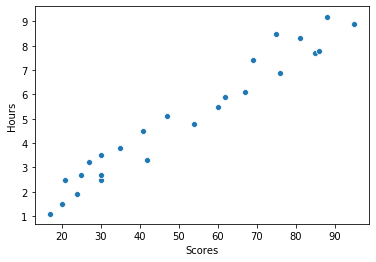

In [45]:
sns.scatterplot(data = df1, x = 'Scores', y = 'Hours')

In [52]:
X = df1['Hours']
y = df1['Scores']

In [47]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [71]:
X_train.head()

19    7.4
23    6.9
21    4.8
6     9.2
12    4.5
Name: Hours, dtype: float64

In [72]:
y_test.head()

9     25.0
22    35.0
13    42.0
11    62.0
5     20.0
Name: Scores, dtype: float64

In [154]:
import statsmodels.api as sm

In [73]:
X_train_sm = sm.add_constant(X_train)

In [190]:
X_train_sm.head()

,const,Hours
19,1.0,7.4
23,1.0,6.9
21,1.0,4.8
6,1.0,9.2
12,1.0,4.5


# (Ordinal Least Square) is used to fit the model

In [74]:
lr = sm.OLS(y_train ,X_train_sm).fit()

In [75]:
lr.params

const    1.989423
Hours    9.835444
dtype: float64

# The summary shows that the fit is good!

In [76]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     356.7
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           2.59e-13
Time:                        12:53:04   Log-Likelihood:                -62.724
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9894      3.106      0.641      0.530      -4.536       8.515
Hours          9.8354      0.521     18.886      0.000       8.741      10.930
==============================================================================
Omnibus:                        7.040   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                1.943
Skew:                          -0.248   Prob(JB):                        0.379
Kurtosis:                       1.556   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

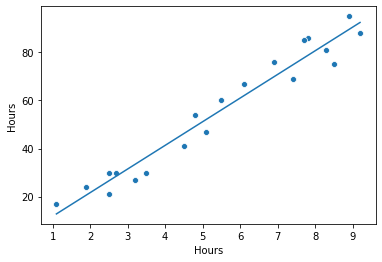

In [124]:
sns.scatterplot(X_train, y_train)
sns.lineplot(x = X_train, y = 1.99 + 9.83*X_train, palette = 'rocket')

In [82]:
y_train_predict = lr.predict(X_train_sm)
res = (y_train - y_train_predict)

In [191]:
y_train_predict.head()

19    74.771712
23    69.853989
21    49.199556
6     92.475511
12    46.248923
dtype: float64

In [192]:
res.head()

19   -5.771712
23    6.146011
21    4.800444
6    -4.475511
12   -5.248923
dtype: float64

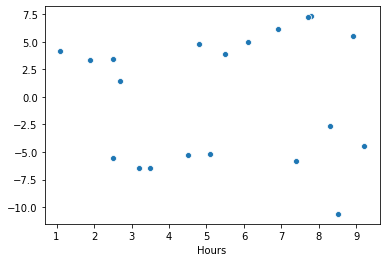

In [83]:
sns.scatterplot(X_train, res, palette = 'deep')

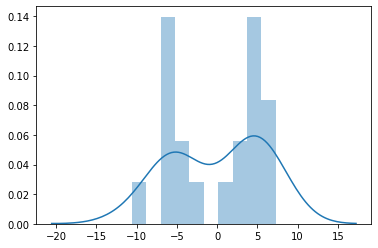

In [86]:
sns.distplot(res, bins = 10)

In [129]:
type(X_test)

pandas.core.series.Series

In [87]:
X_test_sm = sm.add_constant(X_test)

In [149]:
X_test_sm

,const,Hours
9,1.0,2.7
22,1.0,3.8
13,1.0,3.3
11,1.0,5.9
5,1.0,1.5


In [88]:
y_pred = lr.predict(X_test_sm)

In [128]:
y_pred

9     28.545123
22    39.364112
13    34.446390
11    60.018545
5     16.742590
dtype: float64

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [90]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.543287018366107

## Accuracy of Model
### The r2 score of test dataset is within 10% of train dataset which is around 95.2%
### result there is no overfitting issues
#### The model has good accuracy

In [189]:
r2_score(y_test, y_pred)*100

90.50356232459791

In [180]:
pred_m = pd.DataFrame({'Hours': [9.25, 6, 8]})

In [181]:
pred_m1 = pred_m.Hours

In [175]:
pred_m1

0    9.25
1    6.00
Name: Hours, dtype: float64

In [182]:
sma = sm.add_constant(pred_m1)

In [183]:
sma

,const,Hours
0,1.0,9.25
1,1.0,6.00
2,1.0,8.00


In [153]:
type(pred_m1)

pandas.core.series.Series

In [184]:
tm = lr.predict(sma)

# Predicted result for 9.25 hrs/day

In [188]:
print('Predicted score for the student who study 9.25 hrs/day : {}'.format(round(tm[0], 2)))

Predicted score for the student who study 9.25 hrs/day : 92.97


# Predicted score for the student who study 9.25 hrs/day : 92.97